<a href="https://colab.research.google.com/github/rsydx/Predicting-Students-Perfomance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Factors that affecting students performance**

Dataset can be download on kaggle website https://www.kaggle.com/spscientist/students-performance-in-exams

libraries used in this notebook are:
pandas
numpy
matplotlib
seaborn 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%matplotlib inline is used for embedding the plot in the notebook

**Data Preprocessing**

In [7]:
df = pd.read_csv('StudentsPerformance.csv')

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
df.shape

(1000, 8)

In [13]:
df['race/ethnicity'].describe()

count        1000
unique          5
top       group C
freq          319
Name: race/ethnicity, dtype: object

In [14]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
953,male,group C,high school,standard,completed,58,52,54
379,male,group A,bachelor's degree,standard,none,66,64,62
265,male,group D,some high school,free/reduced,none,59,42,41
725,male,group E,some college,standard,completed,81,74,71
41,female,group C,associate's degree,standard,none,58,73,68


In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Calculating student percentage

In [16]:
df['percentage']=(df['math score'] + df['reading score'] + df['writing score'])/3
df['percentage']=df.percentage.round(decimals=2)

In [17]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
722,female,group B,some high school,free/reduced,completed,74,90,88,84.00
388,female,group D,high school,standard,none,62,64,64,63.33
929,female,group C,some high school,free/reduced,none,48,56,51,51.67
210,male,group D,some high school,free/reduced,completed,80,79,79,79.33
4,male,group C,some college,standard,none,76,78,75,76.33
846,male,group C,master's degree,standard,completed,91,85,85,87.00
719,male,group E,associate's degree,free/reduced,completed,91,73,80,81.33
953,male,group C,high school,standard,completed,58,52,54,54.67
54,female,group C,some high school,free/reduced,completed,71,84,87,80.67
404,female,group C,high school,standard,none,54,59,62,58.33


In [18]:
df['percentage'].describe()

count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: percentage, dtype: float64

Finding the top student

In [19]:
# sort values in descending order to obtain top ten student in class

topStudent=df.sort_values('percentage',ascending=False).head(10)
topStudent

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.00
458,female,group E,bachelor's degree,standard,none,100,100,100,100.00
962,female,group E,associate's degree,standard,none,100,100,100,100.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.67
179,female,group D,some high school,standard,completed,97,100,100,99.00
712,female,group D,some college,standard,none,98,100,99,99.00
165,female,group C,bachelor's degree,standard,completed,96,100,100,98.67
625,male,group D,some college,standard,completed,100,97,99,98.67
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,97.67
149,male,group E,associate's degree,free/reduced,completed,100,100,93,97.67


Least 10 scorers

In [20]:
bottomStudent=df.sort_values('percentage',ascending=True).head(10)
bottomStudent

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
59,female,group C,some high school,free/reduced,none,0,17,10,9.00
980,female,group B,high school,free/reduced,none,8,24,23,18.33
596,male,group B,high school,free/reduced,none,30,24,15,23.00
327,male,group A,some college,free/reduced,none,28,23,19,23.33
76,male,group E,some high school,standard,none,30,26,22,26.00
17,female,group B,some high school,free/reduced,none,18,32,28,26.00
601,female,group C,high school,standard,none,29,29,30,29.33
787,female,group B,some college,standard,none,19,38,32,29.67
338,female,group B,some high school,free/reduced,none,24,38,27,29.67
211,male,group C,some college,free/reduced,none,35,28,27,30.00


In [21]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [37]:
topStudent=df.sort_values('percentage',ascending=False)
topTenFemale = (topStudent.loc[topStudent['gender']=='female']).head(10)
topTenFemale

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
458,female,group E,bachelor's degree,standard,none,100,100,100,100.00
962,female,group E,associate's degree,standard,none,100,100,100,100.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.67
179,female,group D,some high school,standard,completed,97,100,100,99.00
712,female,group D,some college,standard,none,98,100,99,99.00
165,female,group C,bachelor's degree,standard,completed,96,100,100,98.67
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,97.67
685,female,group E,master's degree,standard,completed,94,99,100,97.67
957,female,group D,master's degree,standard,none,92,100,100,97.33
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,97.33


In [23]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

**Statistical Data Analysis**

In [24]:
df.mean()

math score       66.08900
reading score    69.16900
writing score    68.05400
percentage       67.77058
dtype: float64

In [25]:
gender_details = df.groupby('gender')[['math score','reading score','writing score','percentage']].mean()
gender_details.sort_values('percentage',ascending=False)

,math score,reading score,writing score,percentage
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837303


In [26]:
parental_lvl_of_edu_details = df.groupby('parental level of education')[['math score','writing score','reading score','percentage']].mean()
parental_lvl_of_edu_details.sort_values('percentage',ascending=False)

,math score,writing score,reading score,percentage
parental level of education,,,,
master's degree,69.745763,75.677966,75.372881,73.598644
bachelor's degree,69.389831,73.381356,73.000000,71.923983
associate's degree,67.882883,69.896396,70.927928,69.568964
some college,67.128319,68.840708,69.460177,68.476106
some high school,63.497207,64.888268,66.938547,65.107654
high school,62.137755,62.448980,64.704082,63.097194


In [27]:
lunch_details = df.groupby('lunch')[['math score','writing score','reading score','percentage']].mean()
lunch_details.sort_values('percentage',ascending=False)

,math score,writing score,reading score,percentage
lunch,,,,
standard,70.034109,70.823256,71.654264,70.837116
free/reduced,58.921127,63.022535,64.653521,62.198986


**Data Visualization**

In [28]:
sns.set_style("whitegrid")

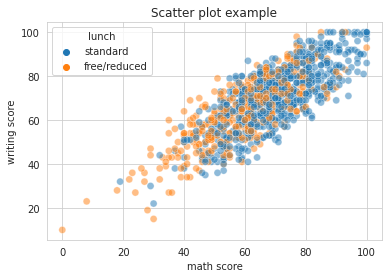

In [29]:
sns.scatterplot(x='math score',y='writing score',data=df, hue= 'lunch',alpha=0.5,s=50); # alpha defines opacity and s defines size of the dots, you can play change them.
plt.title("Scatter plot example"); #giving title to graph
#we didn't need to provide label for x and y axis in seaborn 

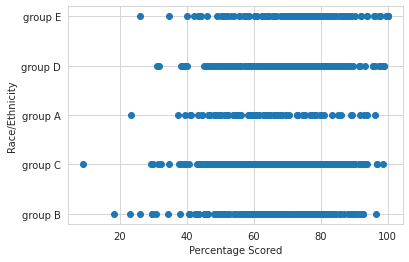

In [30]:
# using matplotlib to plot scatter plot

fig, ax=plt.subplots() # return tuple contains figure and axes objects that are in fig and ax

ax.scatter(df['percentage'],df['race/ethnicity']);
plt.xlabel('Percentage Scored');
plt.ylabel('Race/Ethnicity');

Plot two histogram for data comparison

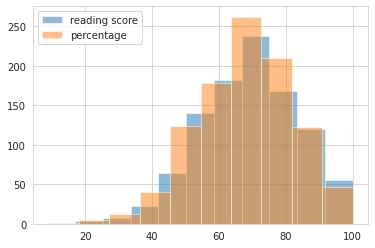

In [31]:
plt.hist(df['reading score'],alpha=0.5);
plt.hist(df.percentage,alpha=0.5);
plt.legend(['reading score','percentage']);

Analyse number of parent based on their level of education using a simple bar

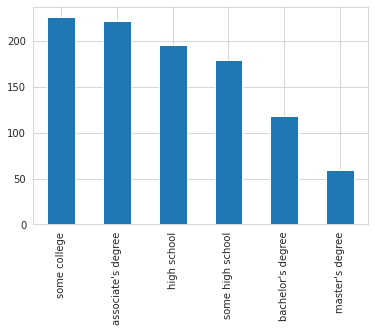

In [33]:
df['parental level of education'].value_counts().plot(kind='bar')

Pie plot

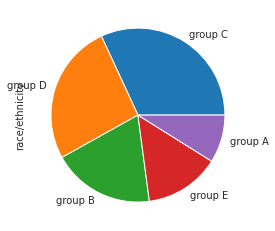

In [36]:
df['race/ethnicity'].value_counts().plot(kind='pie')

Pair plot using seaborn

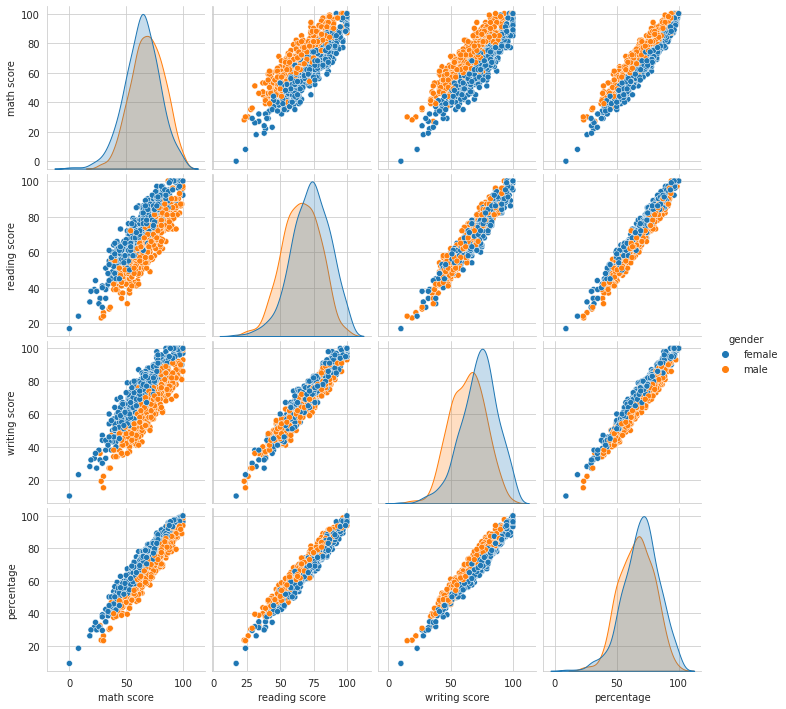

In [41]:
sns.pairplot(df,hue='gender')

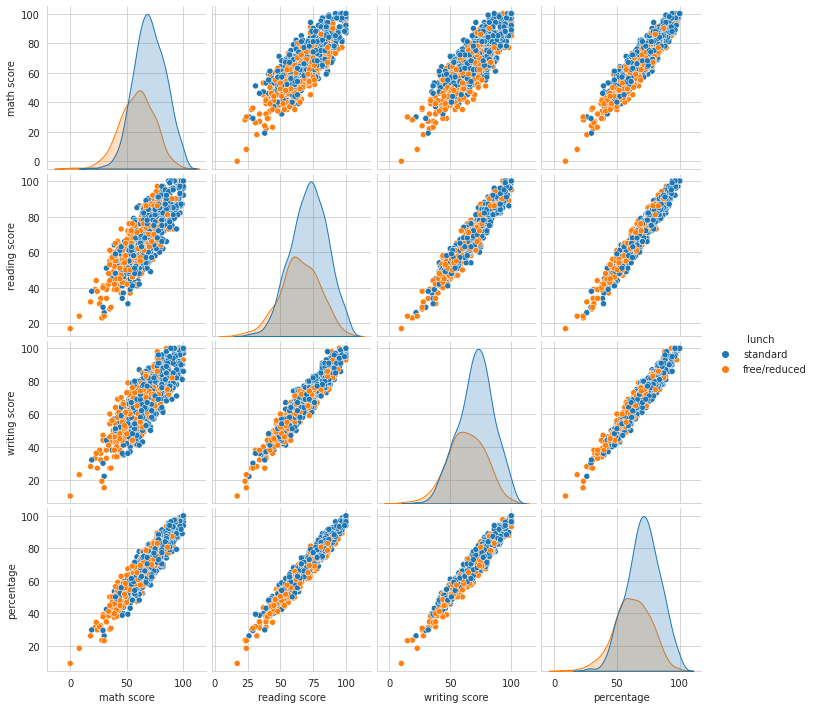

In [42]:
sns.pairplot(df,hue='lunch')

**Explanatory Data Analysis (EDA)**

1. Finding the range of score for majority of students

plotting stacked histogram

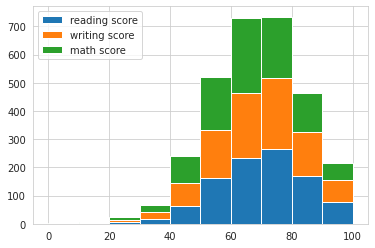

In [44]:
plt.hist([df['reading score'],df['writing score'],df['math score']],stacked=True)
plt.legend(['reading score','writing score','math score'])

stacked histogram can be used to see the total marks scored by students. Based on the graph, we can infer that most students scored between 60-80 marks in these test.

2. Finding which race/ethnicity scored better

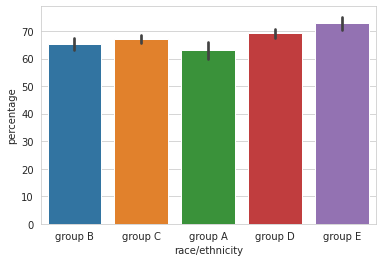

In [45]:
sns.barplot(x='race/ethnicity',y='percentage',data=df)

We can observe that students from group E scored the highest marks then D,C,B then A.

3. Finding which gender performs better

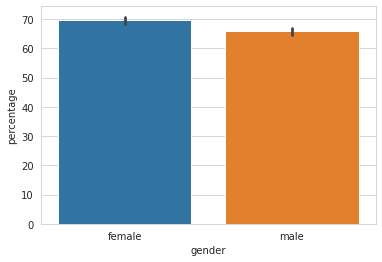

In [47]:
sns.barplot(x='gender',y='percentage',data=df)

based on the results, female scored better than male.

4. Finding the impact of lunch on students performance.

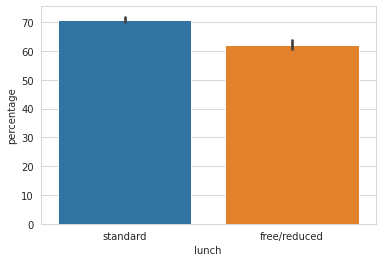

In [48]:
sns.barplot(x='lunch',y='percentage',data=df)

We can infer that student which were provided standard lunch outperformed students with free/reduced lunch

5. Finding how student preparation for exam affect their test score.

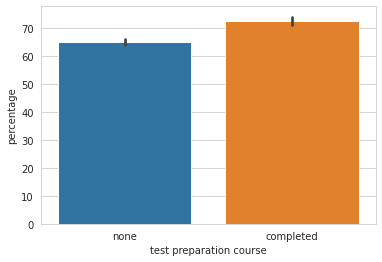

In [49]:
sns.barplot(x='test preparation course',y='percentage',data=df)

Yes, student who are well prepared scored better than who don't.

6. Finding how parents level of education affect their child performance.

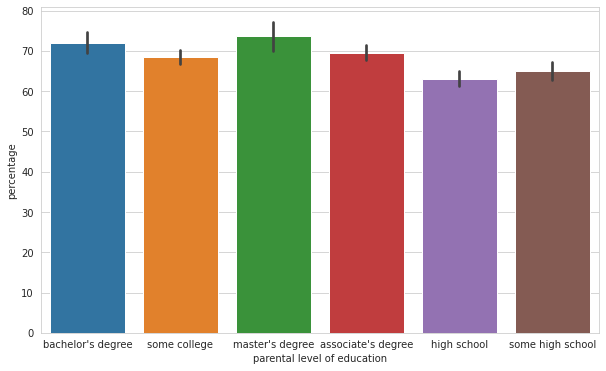

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x='parental level of education', y='percentage',data=df)

Yes, parental level of education does impact their child performance.

**Summary**

Based on the given dataset, we can observe that the student performance depend on multiple variable like some of the attributes mentioned above. There are many correlation between student performance and amenities provided to individual.